## Simulated annealing

Simulated Annealing can always accepts improvements, but also  worse solutions with some probability.
In order to get to global optima one might have to accept steps to get worse temporarily

##### The algorithm:

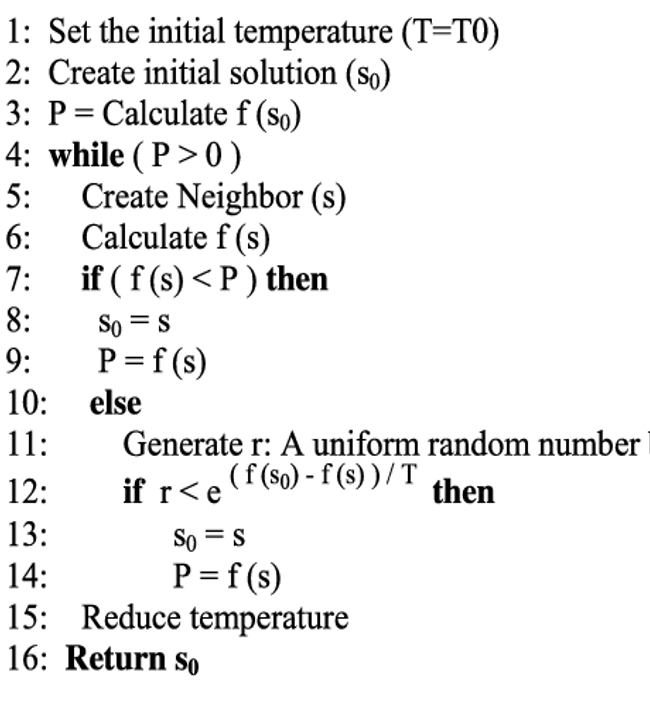

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import random
import time

In [2]:
#simulated annealing algorithm
def objective(x):
    return np.abs(x[0]) + 0.25 * np.sin(x[0] * 15);

In [3]:
def simulated_annealing(obiective, bounds, n_iterations, step_size ,temp, init):
    # Some lists to collect results
    newpt=[]  # list of points
    newscores = []
    c=[]
    cscore=[]
    # a generate an initial point
    best=[init]
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = curr + np.random.rand(len(bounds)) * step_size
        newpt.append(candidate)
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # keep track of scores scores
        newscores.append(candidate_eval)
        # check for new best solution
        if (candidate_eval < best_eval):
            # store new best point
            best, best_eval = candidate, candidate_eval
            # report progress
            print('s%d f(%s) = %.5f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = np.exp(-diff / t)
          # check if we should keep the new point
        if (diff < 0) or (np.random.rand() < metropolis):
              # store the new current point
            curr, curr_eval = candidate, candidate_eval
        c.append(curr)
        cscore.append(curr_eval)
    return (best, best_eval, newpt, newscores, c, cscore)

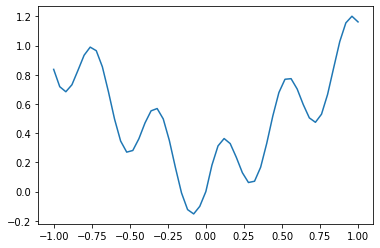

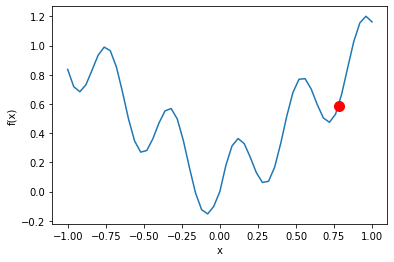

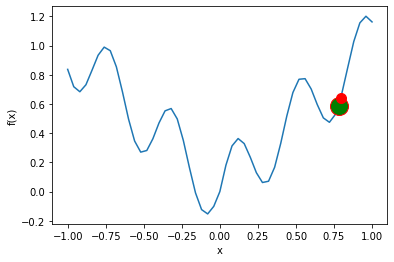

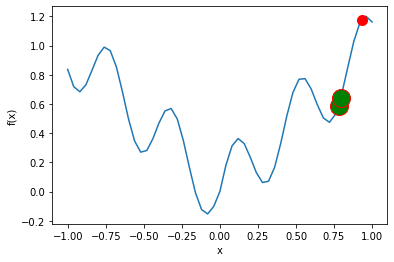

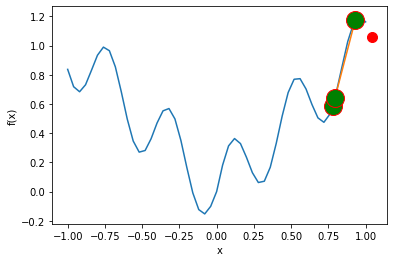

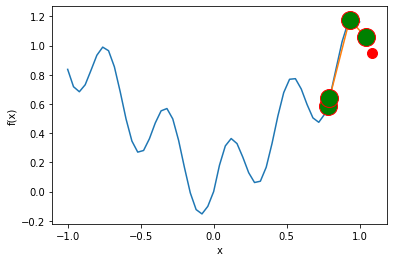

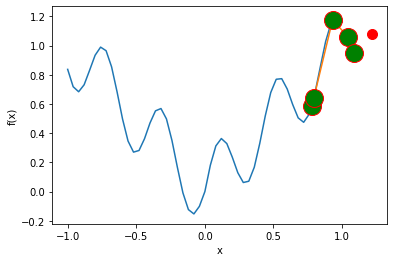

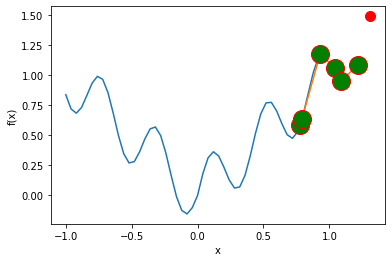

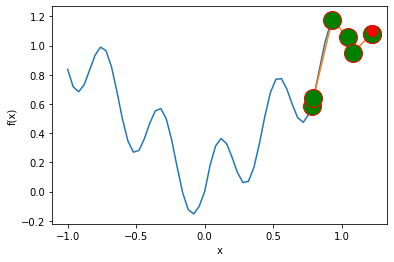

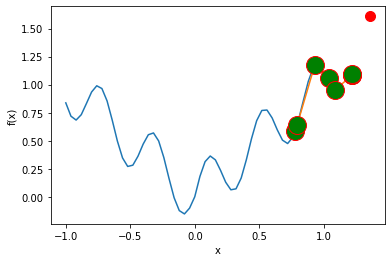

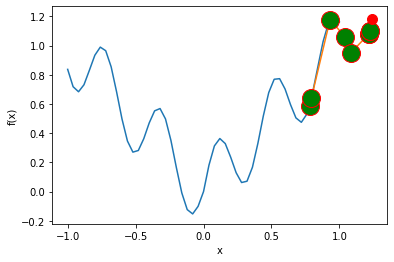

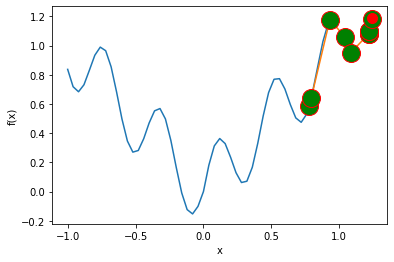

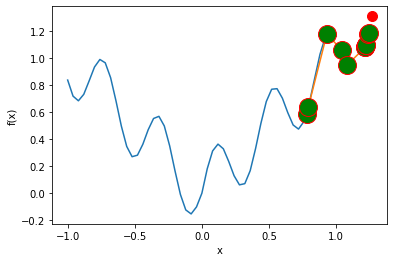

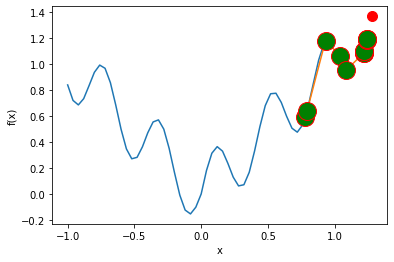

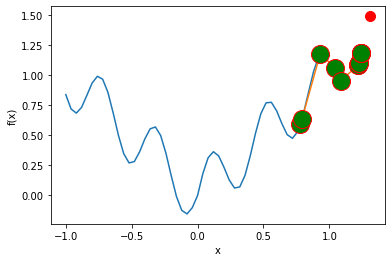

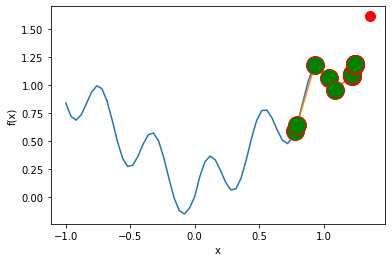

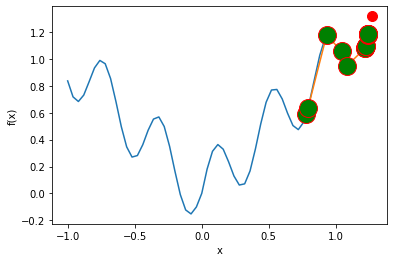

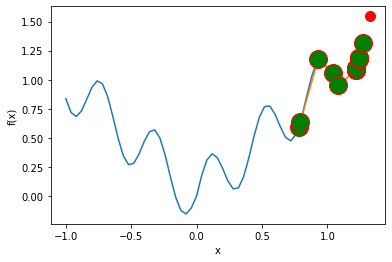

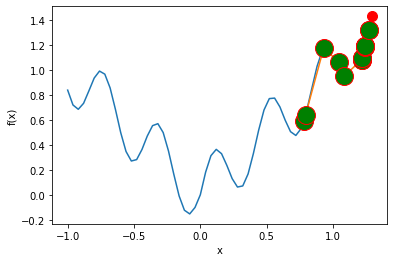

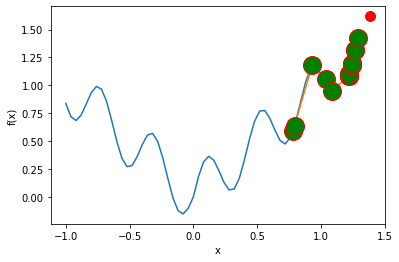

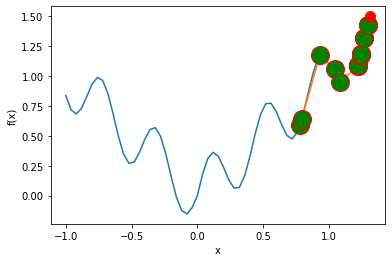

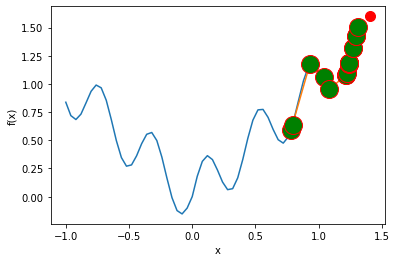

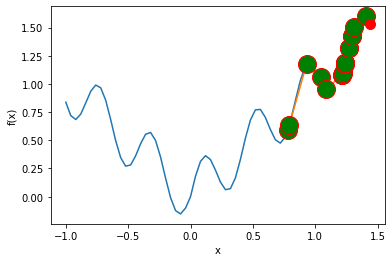

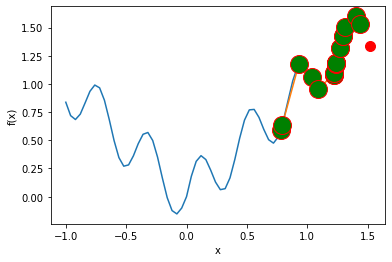

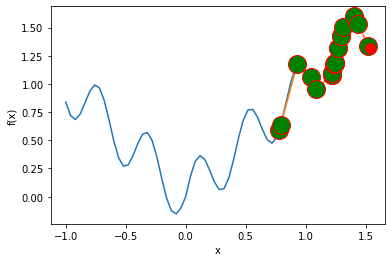

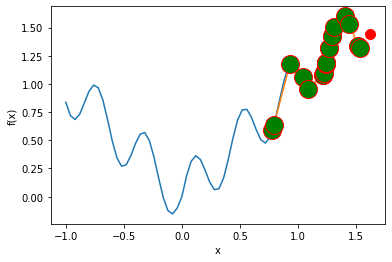

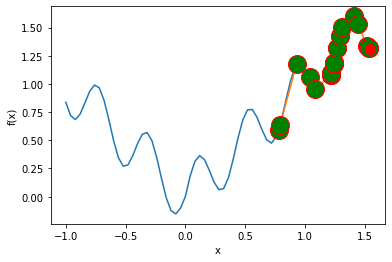

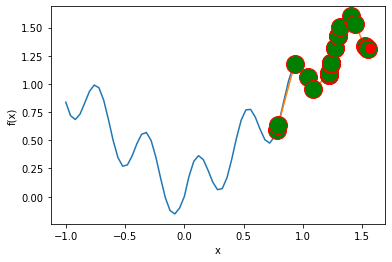

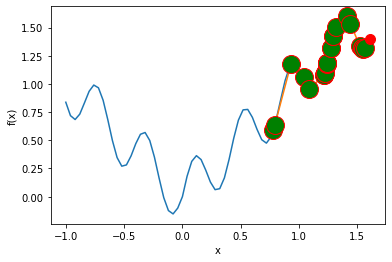

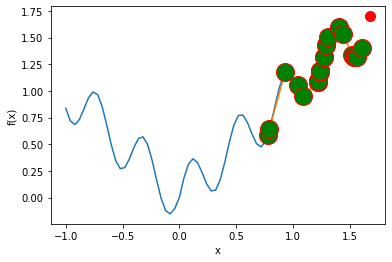

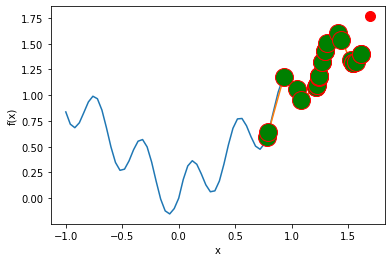

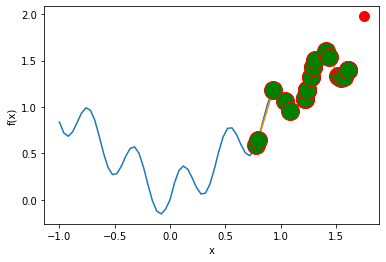

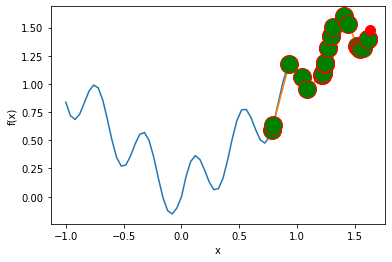

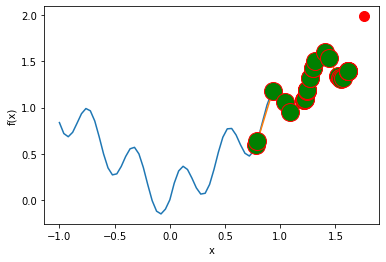

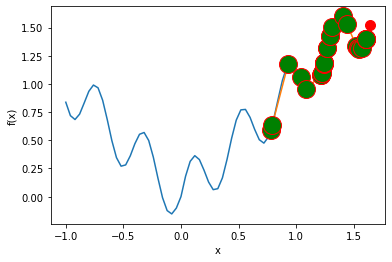

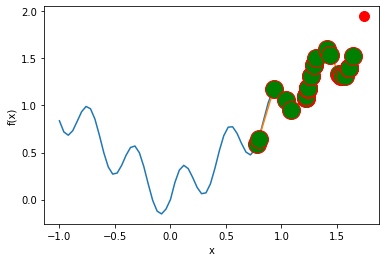

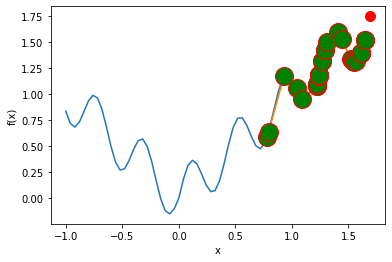

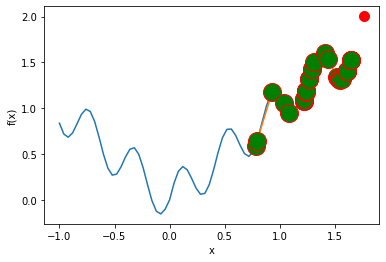

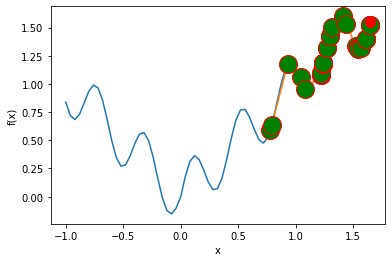

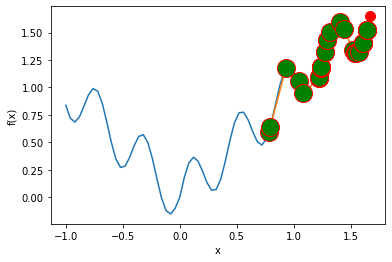

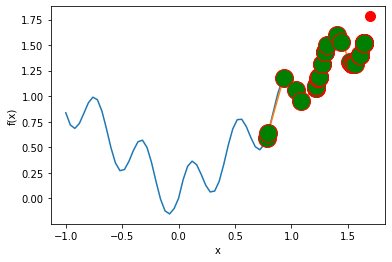

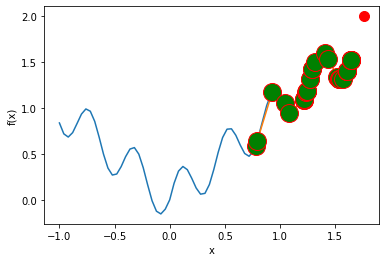

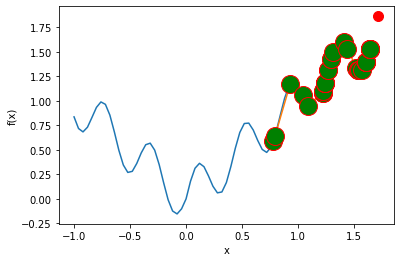

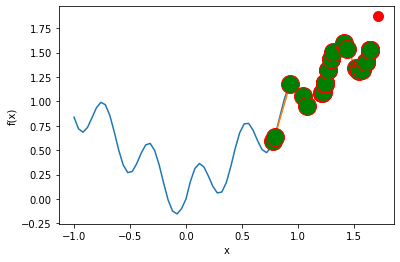

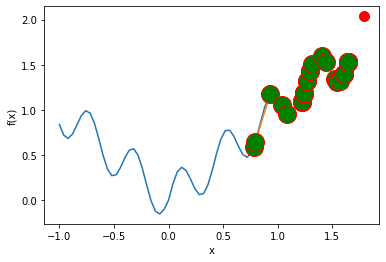

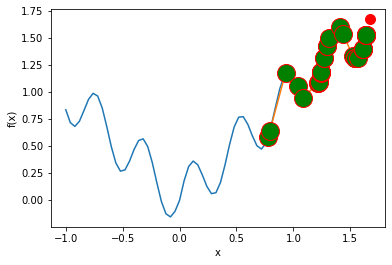

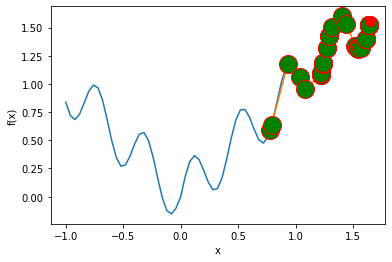

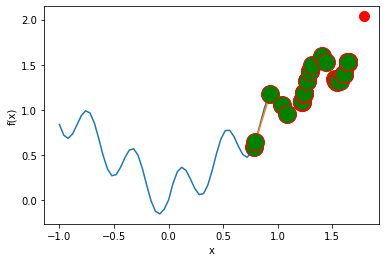

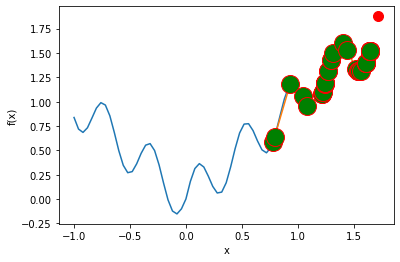

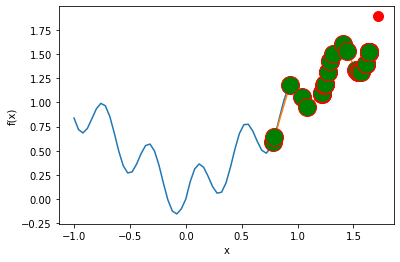

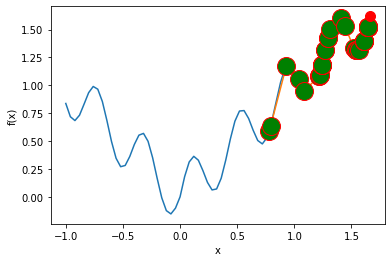

In [4]:
# Set random seed
random.seed(1)

# Define the search space
lb=-1
ub=1
bounds=np.asarray([[lb,ub]])
# Random number generator initialization seed(1)
n_iterations = 50
#define the maximum step size
step_size = 0.15
#initial temperature
temp = 1.5
# initial point
init=0.65
# perform the simulated annealing search
best, score, st, scores, c, cscores = \
    simulated_annealing(objective, bounds, n_iterations, step_size, temp, init)

def f1d(x):
    a=[]
    a.append(x)
    return objective(a)

# Plotting just the function
x = np.linspace(start = lb # lower limit
                 ,stop = ub # upper limit,
                 ,num = 51) # generate 51 points between 0 and 3
y = f1d(x) # scalar values in array x will be evaluated

plt.plot(x, y)
plt.show()

#
for i in range(n_iterations):
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.plot(x, y)
    plt.plot(c[0:i], cscores[0:i],
           marker="o",
           markersize=18,
           markeredgecolor="red",
           markerfacecolor="green")
    plt.plot(st[i], scores[i],'.r',ms=20)
    plt.show()
    time.sleep(1)